In [1]:
import xarray as xr
import rasterio
import numpy as np 

import matplotlib.pyplot as plt
from matplotlib.cm import YlOrBr
import matplotlib.colors as colors

import sys
sys.path.append("../AWS_Scripts/")

import functions_model_analysis as f
import functions_training_pipeline as f_tp

# PLOTS

Basis:
- #FFFFCC (yellow)
- #FFEDA0 (light yellow)
- #FED976 (light orange)
- #FC8D59 (orange)
- #E34A33 (reddish orange)
- #B30000 (brownish red)
- #662506 (dark brown)
- #808080 (gray)
- #D3D3D3 (lightgray)

More:
- #FEE6CE (pale orange)
- #FDAE6B (bright orange)
- #FDBB84 (warm orange)
- #FC8D62 (coral)
- #EF6548 (reddish coral)
- #D7301F (dark coral)
- #8B0000 (dark red-brown)

light yellow / white: #ffffe5

orange: #fead3a

brown/red: #9c3605      or      firebrick

gray: #808080

lightgray: #D3D3D3

In [2]:
cmap = YlOrBr
cmap.set_bad('gray',1.)
cbar_kwargs={'label': "Snow Optical Grain Diameter (mm)"}
figsize=(6.4*1, 4.8*1)

## METHODS: Raster Alignment Section - Example Microwave vs. Optical

In [9]:
opt_path = r"../Data/optical-rs/2019-07-03_grain_diameter.tif"
mw_path_tif = r"../Data/microwave-rs/mw-tif/2019-07-03_mw.tif"

data_mw_tif = xr.open_dataarray(mw_path_tif)
data_opt = xr.open_dataarray(opt_path)

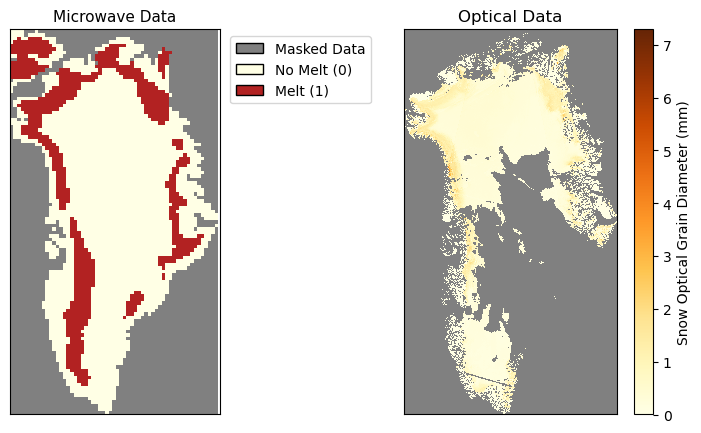

In [16]:
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,  figsize=(9.5,5))



# Plot the categorical data
colors_list = ["#808080", "#ffffe5", "firebrick"]  # Blue, Green, Red
# Create the colormap
my_cmap = colors.ListedColormap(colors_list)
cat_im = data_mw_tif.plot(ax=axs[0], cmap=my_cmap, add_colorbar=False)
axs[0].set_title('Microwave Data')
# set title font size
axs[0].title.set_size(11)

# Add legend to categorical data plot
legend_labels = ['Masked Data', 'No Melt (0)', 'Melt (1)']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors_list[i]) for i in range(3)]
# Iterate through the handles and call `set_edgecolor` on each
for ha in legend_handles:
    ha.set_edgecolor("black")

axs[0].legend(legend_handles, legend_labels, bbox_to_anchor=(1.75,1))


# Plot the continuous data
cont_im = data_opt.plot(ax=axs[1], cmap=cmap, cbar_kwargs=cbar_kwargs)
axs[1].set_title('Optical Data')



for idx, ax in enumerate(axs):
    ax.set_aspect("equal")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)


plt.show()